In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


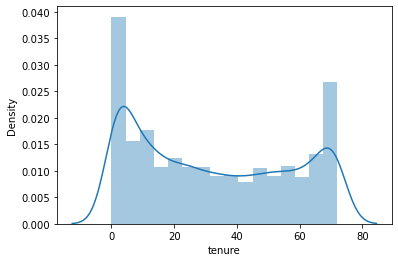

In [26]:
sns.distplot(data['tenure'])

In [10]:
data = data.drop(["customerID"], axis=1)

In [11]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
y = data.Churn

In [13]:
data = data.drop(["Churn"], axis=1)
#Churn değerlerini bir tabloya atıp, kendi veri setimizde bir etkisi olmaması adına kaldırıyoruz.

In [14]:
#Veri setinde “Female, Yes, No” gibi değerleri factorize ile numerik hale getiriyoruz. 
#Bu şekilde modellemeye dahil edebiliriz.

In [15]:
char_cols = data.dtypes.pipe(lambda x: x[x == 'object']).index
for c in char_cols:
    data[c] = pd.factorize(data[c])[0]
print(data)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        0           0       1             0   
1          1              0        1           0      34             1   
2          1              0        1           0       2             1   
3          1              0        1           0      45             0   
4          0              0        1           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        0           1      24             1   
7039       0              0        0           1      72             1   
7040       0              0        0           1      11             0   
7041       1              1        0           0       4             1   
7042       1              0        1           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 0                0     

*** Verilerin birbiriyle fazla ilişkili olması, analizimizi sapıtırabilir. Bu yüzden korelasyonuna bakıyoruz. Koyu bölgeler değişkenlerin birbiriyle daha fazla ilişkili olduğunu gösteriyor ***

<AxesSubplot:>

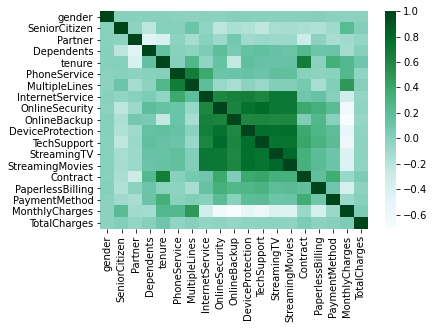

In [16]:
data.corr()
sns.heatmap(data.corr(),cmap="BuGn")

### Train - Test

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.20)

In [27]:
from sklearn.svm import SVC
svclassifier = SVC(kernel="linear", degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='linear')

In [28]:
y_pred = svclassifier.predict(X_test)

*** tahminimizin ne kadar doğru olduğunu anlamak adına Confusion Matrix metodunu uyguluyoruz. Precision, churn olarak tespit ettiklerimizin gerçekte ne kadarının churn olduğunu gösterir. Recall ise, gerçekte churn olanların ne kadarını doğru tahmin ettiğimizi gösterir. ***

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[964  99]
 [184 162]]
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1063
         Yes       0.62      0.47      0.53       346

    accuracy                           0.80      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.79      0.80      0.79      1409



In [30]:
pred = pd.DataFrame(y_pred)
pred.head()

,0
0,No
1,No
2,No
3,No
4,No
